In [2]:
#### Install and import libraries
### Needed library for EDA; pandas, seaborn,matplotlib,numpy,scipy

In [3]:
%pip install pandas seaborn matplotlib numpy scipy


In [4]:
## Import required lib.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp


### Filter warnings
import warnings
warnings.filterwarnings('ignore')

### Set seaborn layout
sns.set_theme(style="whitegrid")

Reading the Data

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows


Navigating the File Directory after sucessful download from Colab

In [6]:
import os

# Use the path from your output
download_path = "/kaggle/input/netflix-shows"

# List the contents of the directory
print(os.listdir(download_path))

['netflix_titles.csv']


In [7]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
### Check the Data types
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


Data cleaning concerns
Date (to be in Date)

In [10]:
### Deep check my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Field with missing value
Director, cast, country,date_added,rating,duration.
 Remember that Category dataset with Missing Value replace with Mode, and Numerical with Mean/Median

In [14]:
### checking the missing values sum per column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [16]:
### % of all value to apply the Rule of thump of Missingness (To read)
(df.isnull().sum()/len(df)*100).round(2)

,0
show_id,0.00
type,0.00
title,0.00
director,29.91
cast,9.37
country,9.44
date_added,0.11
release_year,0.00
rating,0.05
duration,0.03


From the domain Idea missing value will be replaced


*   replace missing director with "Unknown"

*  replace missing cast with "Not_Available"


*   replace rating "Not_rated"





In [25]:
### describe the numerical column
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
date_added,8709,2019-05-23 01:45:29.452290816,2008-01-01 00:00:00,2018-04-20 00:00:00,2019-07-12 00:00:00,2020-08-26 00:00:00,2021-09-25 00:00:00,NaN
release_year,8807.0,2014.180198,1925.0,2013.0,2017.0,2019.0,2021.0,8.819312
year_added,8709.0,2018.887932,2008.0,2018.0,2019.0,2020.0,2021.0,1.567961
latency,8709.0,4.690894,-3.0,0.0,1.0,5.0,93.0,8.792208


In [26]:
### Describe for non_numerical column
## df.describe(include=object).transpose()
df.describe(exclude=np.number).transpose()


,count,unique,top,freq,mean,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8709,NaN,NaN,NaN,2019-05-23 01:45:29.452290816,2008-01-01 00:00:00,2018-04-20 00:00:00,2019-07-12 00:00:00,2020-08-26 00:00:00,2021-09-25 00:00:00
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN
listed_in,8807,514,"Dramas, International Movies",362,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
### Fill the NA in Director columns
df['director'] = df['director'].fillna("Unknown")


In [28]:
### Fill the NA in Cast columns
df['cast'] = df['cast'].fillna("Not_rate")

In [29]:
### Fill the NA in Cast columns
df['rating'] = df['rating'].fillna("Not_rated")

In [30]:
df['cast']= df['cast'].fillna("Not_available")

In [31]:
df['country']=df['country'].fillna("Unknown")

In [32]:
### replace the duration with Unavailable
df['duration'] = df['duration'].fillna('Unavailable')

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,latency
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,1.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,0.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,0.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September,0.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September,0.0


In [23]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,98
release_year,0
rating,4
duration,3


In [17]:
# To convert date_added to datetime and replace missing with NaT
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['date_added'].dtype

dtype('<M8[ns]')

In [22]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,98
release_year,0
rating,4
duration,3


In [18]:
## Parse date_added to year and month columns (new)
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September


In [19]:
### Checking the latency of release_year to year_added
df['latency'] = df['year_added'] - df['release_year']
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,latency
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,1.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,0.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,0.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September,0.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September,0.0


Analysis commenced now as I am done cleaning the Data

In [20]:
#### Top 5 director
df['director'].value_counts().head(10)

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12


Observation: Most popular director is Rajiv Chilaka, but we have a business conern as most movies have no Directors. Thus there is need to discuss with the Business CEO to identify as it could be potention business revue boaster.

In [21]:
# Demography analysis
df['country'].value_counts().head(10).transpose()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


Observation: Most our viewers are from USA,India, S.Korea, however there is high viewrs from Countries we do not know, which posse a business risk for us.

In [37]:
# of Type Movies and Tv Shows
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


Regular Expressio  AKA Regex Cleaning Application on duration column.
Note: It works on Strings.

In [50]:
# convert the duration column (obj) to str
df['duration']=df['duration'].astype(str)

# extract the minutes with regex
df['duration_min'] = df['duration'].str.extract(r'(\d+)\s*min', expand=False)
df['duration_min'] = pd.to_numeric(df['duration_min'],errors='coerce')

# extract the Seasons with regex
df['duration_seasons']= df['duration'].str.extract(r'(\d+)\s*Season', expand=False)
df['duration_seasons'] = pd.to_numeric(df['duration_seasons'],errors='coerce')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,latency,duration_min,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not_rate,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,1.0,90.0,NaN
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September,0.0,NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September,0.0,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not_rate,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September,0.0,NaN,1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September,0.0,NaN,2.0


In [53]:
### The Avg duartion of Movie and tv Show
df.groupby('type')[['duration_min','duration_seasons']].mean().round(2)

,duration_min,duration_seasons
type,,
Movie,99.58,NaN
TV Show,NaN,1.76


In [61]:
# to Create a collum called df_genres( show_id, title, listed_in)
df_genres = df[['show_id','title','listed_in']].copy()
df_genres['listed_in'] = df_genres['listed_in'].fillna("")
df_genres['genres_list'] = df_genres['listed_in'].apply(lambda s: [g.strip() for g in s.split(',') if g.strip()])
df_genres_exploded = df_genres.explode('genres_list')
genres_counts = df_genres_exploded['genres_list'].value_counts().rename_axis('genre').reset_index(name='counts')
print(genres_counts.head(10))

df_genres = df_genres_exploded # Corrected assign the exploded dataframe back to df_genres

                      genre  counts
0      International Movies    2752
1                    Dramas    2427
2                  Comedies    1674
3    International TV Shows    1351
4             Documentaries     869
5        Action & Adventure     859
6                 TV Dramas     763
7        Independent Movies     756
8  Children & Family Movies     641
9           Romantic Movies     616


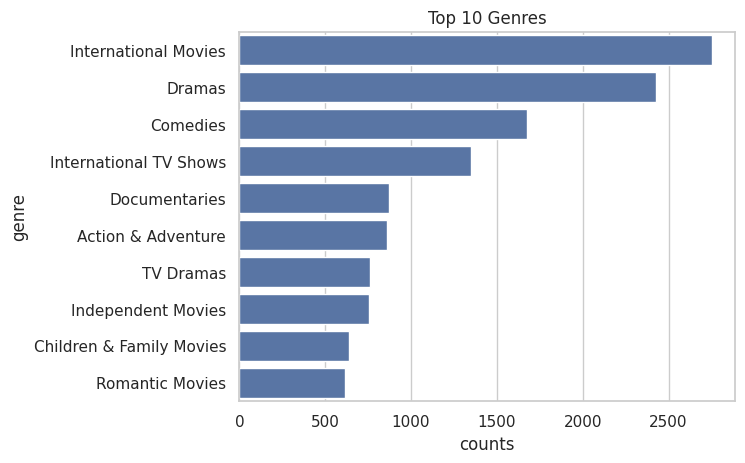

In [70]:
# Show the top 10 genres with seaborn bar chart
sns.barplot(x='counts', y='genre', data=genres_counts.head(10))
plt.title('Top 10 Genres')
plt.show()

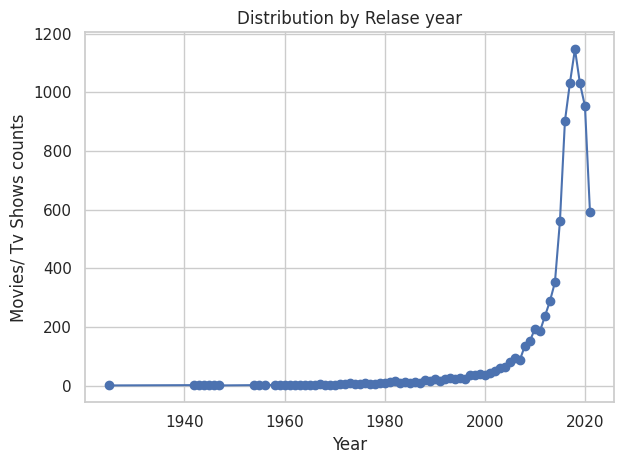

In [74]:
# Show distribution of movies/tv shows relased per year
plt.plot(df['release_year'].value_counts().sort_index(),marker='o')
plt.title("Distribution by Relase year")
plt.xlabel('Year')
plt.ylabel('Movies/ Tv Shows counts')
plt.tight_layout()
plt.show()